##### [< Forrige](4%20-%20lister_oppslag_numpy.ipynb)     |     [Neste >](6%20-%20Logikk_løkker.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 5 - Pandas og databehandling </span>  

# **Pandas** - et verktøy for behandling og lasting av data
I denne delen skal vi utforske hvordan du kan bruke Pandas til å håndtere og modifisere data. Vi skal også gå gjennom grunnleggende databehandling, filtrering, aggregering og visualisering.

# 1. Introduksjon til Pandas
Pandas er et kraftig verktøy for datahåndtering og analyse. Det gir deg muligheten til å arbeide med datasett som er representert som DataFrames, en struktur som ligner regneark som dere kanskje kjenner fra Excel.

Men først, som alle pakker i Python, må vi laste den inn først.

Først, hvis vi ikke har gjort det, bruker vi ```pip install``` for å laste ned pandas. Det kan gjøres ved å skrive følgende:

```python
        # Laster ned pandas med pip
        !pip install pandas
```

Så må vi importere modulen, at vi "henter" den klar for bruk, ved å kjøre cellen under: 

In [1]:
import pandas as pd

## **Eksempel: Importere Pandas og laste inn en CSV-fil**
Det gjør vi ved å skrive følgende:

```python
        # Laste inn en CSV-fil som et DataFrame
        data = pd.read_csv('data/eksempel_data.csv')

        # Vise de første radene i DataFrame
        data.head()
```

MEN! Her er det viktig å huske på at *'data/eksempel_data.csv'* må være *banenavn* til filen du ønsker å lese. Den er altså unik for din PC/MAC.

**OBS!** En del Windows brukere må skrive en `r` (som står for *read*) foran `'data/eksempel_data.csv'`, altså slik `data = pd.read_csv(r'data/eksempel_data.csv')`, så prøv det om du får feilmelding.

In [2]:
# Laste inn en CSV-fil som et DataFrame
data = pd.read_csv('DERES_PATH/schooling-gdp.csv')

### OBS: FÅR DU FEILMEDLING OVER, SJEKK AT FILBANEN ER RIKTIG TIL DIN MAC/PC!!! ###

# Vise de første radene i DataFrame
data.head()

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.680,11.65,4886000
1,Kuwait,KWT,67029.523,6.39,2992000
2,Luxembourg,LUX,57882.809,11.33,508000
3,Switzerland,CHE,55688.020,12.92,7809000
4,United States,USA,49500.629,13.24,309011008


Vi ser at vi har fire variabler: `Land`, `Landkode`, `BNP_per_capita` (BNP per innbygger), `Utdanning` og `Befolkning`. BNP er "brutto nasjonalprodukt" som måler hvor mye som produseres i et land i løpet av et år. `BNP_per_capita` viser altså hvor mye hver person i landet produserer hvert år i gjennomsnitt.  

Import av data til `pandas` gjøres enkelt med funksjonen `read_csv`. Dersom du har lastet ned siste versjon av notebooks, ligger den en fil i mappen "data" som heter schooling-gdp.csv. (kilde: [Our World In Data](https://ourworldindata.org/grapher/correlation-between-mean-years-of-schooling-and-gdp-per-capita)). Denne filen inneholder data om BNP (bruttonasjonalprodukt) og utdanningsnivå for ulike land i 2010.

## **Operasjoner på dataframe's**
Vi antar at vi har kalt *dataframen* (norsk: *dataramme*) for ```data``` (som over). 

Her er en liste av operasjoner vi kan gjøre for å inspisere, endre og bli kjent med data'en vår ved hjelp av Pandas. Denne kan være et fint oppslagsverk for hva dere kan trenge om Pandas. Dokumentasjon om dette finnes også [her](https://pandas.pydata.org/docs/) og over "hele" Google!

| **Operasjon**                          | **Formål**                                                     | **Syntaks i Python**                                |
|----------------------------------------|----------------------------------------------------------------|-----------------------------------------------------|
| Vise kolonneoverskriftene              | Viser navnene på kolonnene i DataFrame                         | `data.columns`                                      |
| Velge en spesifikk kolonne             | Hente data fra en spesifikk kolonne                            | `data['kolonnenavn']`                               |
| Filtrere rader basert på betingelse     | Filtrere data der en betingelse er oppfylt                     | `data[data['Utdanning'] > 10]`                     |
| Sjekke manglende verdier               | Sjekker om det finnes manglende verdier i datasetet            | `data.isnull().sum()`                               |
| Fylle manglende verdier                | Fyller inn manglende verdier med en gitt verdi                 | `data.fillna(0, inplace=True)`                      |
| Beskrivelse av numeriske verdier        | Gir en statistisk oversikt over numeriske kolonner             | `data.describe()`                                  |
| Sortere data (stigende)                | Sorterer data etter en kolonne i stigende rekkefølge            | `data.sort_values('kolonnenavn', ascending=True)`  |
| Se datatyper                           | Viser datatypene til hver kolonne                              | `data.dtypes`                                       |
| Konvertere datatype                    | Endrer datatype for en spesifikk kolonne                       | `data['kolonne'] = data['kolonne'].astype(float)`   |
| Lese fra Excel-fil                     | Leser data fra en Excel-fil                                    | `data = pd.read_excel('filnavn.xlsx')`              |
| Ny kolonne med beregninger             | Oppretter en ny kolonne som er et resultat av beregninger       | `data['new_column'] = data['kolonne1'] / data['kolonne2']` |
| Finne duplikater                       | Sjekker om det finnes dupliserte rader                         | `data.duplicated()`                                 |
| Fjerne duplikater                      | Fjerner dupliserte rader                                       | `data.drop_duplicates(inplace=True)`                |
| Histogram                              | Lager et histogram for en spesifikk kolonne                    | `data['kolonnenavn'].plot(kind='hist')`             |
| Konvertere til datetime                | Konverterer en kolonne til datetime-objekter                   | `data['dato'] = pd.to_datetime(data['dato'])`       |
| Informasjon av datarammen              | Oppsummere hva datarammen er og består av                      | `data.info()`                                       |
| Velger rader med **loc**               | Velge rader basert på etiketter (navn)                         | `data.loc[2, 'Navn']`                               |
| Velger rader med **iloc**              | Velge rader basert på indeksnummer                             | `data.loc[2, 1]`                                    |
| "Merge" to DataFrames                  | Kombinere to DataFrames basert på en felles kolonne            | `df3 = df1.merge(df2, on='ID', how='inner')`        |
| Oppsummerende statistikker             | Gir spesifikke beregninger som gj.snitt, median, maks, osv.       | `data['kolonne'].mean()` eller `data['kolonne'].median()`  |




... og det er mange, mange fler. Det vil dere få testa dere på gjennom oppgavene. Kommer du over et problem du ikke har sett før, prøv å google det. 

Lurer du på noe, så har noen lurt på det samme før deg :-)

## Eksempelbruk av operasjoner på dataframe's
Siden vi allerede har kjørt kodeblokken over, har vi variabelen ```data```, som inneholder dataframe'n med data fra 'schooling-gdp.csv'-filen vår.

In [3]:
# 1. Viser kolonneoverskriftene
print(data.columns)

Index(['Land', 'Landkode', 'BNP_per_capita', 'Utdanning', 'Befolkning'], dtype='object')


Her ser i at vi får navn på alle kolonnene i dataframe'n vår. Nyttig inspeksjon!

In [4]:
# 2. Velg en spesifikk kolonne (BNP per capita)
bnp_column = data['BNP_per_capita']
print(bnp_column)

0      73262.68000
1      67029.52300
2      57882.80900
3      55688.02000
4      49500.62900
          ...     
101      972.04572
102      969.23077
103      845.86932
104      786.67023
105      634.97137
Name: BNP_per_capita, Length: 106, dtype: float64


Her ser vi verdiene for kolonnen `BNP_per_capita`, vi ser kolonnens `Name`, `Length` (altså hvor mange tall) og 'dtype' (her har vi et flyttall (float)).

In [5]:
# 3. Filtrer rader basert på en betingelse (land med utdanning > 10 år)
high_education = data[data['Utdanning'] > 10]
print(high_education)

                   Land Landkode  BNP_per_capita  Utdanning  Befolkning
0                Norway      NOR      73262.6800      11.65     4886000
2            Luxembourg      LUX      57882.8090      11.33      508000
3           Switzerland      CHE      55688.0200      12.92     7809000
4         United States      USA      49500.6290      13.24   309011008
5               Ireland      IRL      47823.5040      12.45     4554000
6             Australia      AUS      44854.9020      11.69    22155000
7           Netherlands      NLD      44004.1450      11.71    16683000
8               Denmark      DNK      43416.2230      11.97     5555000
9             Hong Kong      HKG      41687.9490      12.20     6966000
10              Germany      DEU      40627.2300      12.58    80827000
11              Austria      AUT      40489.8090      10.13     8410000
12               Sweden      SWE      40421.9060      11.95     9390000
13               Canada      CAN      40269.0310      12.74    3

Her får vi listet opp alle landene som har at `Utdanning` er over 10 år.

In [6]:
# 4. Sjekke om det finnes noen manglende verdier (også kalt: NAN - Not a Number)
missing_values = data.isnull().sum()
print(missing_values)

Land              0
Landkode          0
BNP_per_capita    0
Utdanning         0
Befolkning        0
dtype: int64


Denne koden sjekker om det er manglende verdier i datasettet vårt. Her er det '0' i alle kolonnene, som betyr at det er data i alle cellene i dataframe'n, men jobber man med ekte data - trenger det slett ikke være tilfelle.

In [23]:
# Alternativt til 4.
data.isna()
data.isna().sum()

Land              0
Landkode          0
BNP_per_capita    0
Utdanning         0
Befolkning        0
BNP_total         0
dtype: int64

In [7]:
# 5. Fyll manglende verdier (hvis det var noen) med 0
data.fillna(0, inplace=True)

Koden over vil fulle inn '0' der det er manglende verdier. Men det kan godt tenkes man burde ta gjennomsnitt, median eller en annen verdi her. Det vil avhenge av datasettet man har.

In [8]:
# 6. Beskrivelse av numeriske verdier
description = data.describe()
print(description)

       BNP_per_capita   Utdanning    Befolkning
count      106.000000  106.000000  1.060000e+02
mean     17295.935035    8.629434  5.755919e+07
std      16527.233275    2.918427  1.807718e+08
min        634.971370    1.950000  2.820000e+05
25%       4037.425625    6.425000  6.290000e+06
50%      11444.386500    8.745000  1.482050e+07
75%      27165.069000   11.110000  4.025450e+07
max      73262.680000   13.240000  1.368811e+09


Her får vi en beskrivelse av de numeriske verdiene i dataframe'n. 

In [9]:
# 7. Sortere data etter BNP per capita (stigende)
sorted_data = data.sort_values('BNP_per_capita', ascending=True)
print(sorted_data)

                             Land Landkode  BNP_per_capita  Utdanning  \
105  Democratic Republic of Congo      COD       634.97137       3.79   
104                       Liberia      LBR       786.67023       4.35   
103                         Niger      NER       845.86932       1.95   
102                    Mozambique      MOZ       969.23077       2.03   
101                        Malawi      MWI       972.04572       5.01   
..                            ...      ...             ...        ...   
4                   United States      USA     49500.62900      13.24   
3                     Switzerland      CHE     55688.02000      12.92   
2                      Luxembourg      LUX     57882.80900      11.33   
1                          Kuwait      KWT     67029.52300       6.39   
0                          Norway      NOR     73262.68000      11.65   

     Befolkning  
105    64564000  
104     3891000  
103    16464000  
102    23532000  
101    14540000  
..          ...

Her har vi sortert data'en i stigende rekkefølge, basert på variablen `BNP_per_capita`. Hadde vi satt ```ascending=False```, ville det være i synkende rekkefølge!

In [10]:
# 8. Se datatypene
data_types = data.dtypes
print(data_types)

Land               object
Landkode           object
BNP_per_capita    float64
Utdanning         float64
Befolkning          int64
dtype: object


Her ser vi datatypene til kolonnene våre.

In [11]:
# 9. Konvertere en kolonne til en annen datatype (Befolkning til float)

data['Befolkning'] = data['Befolkning'].astype(float)
data['Befolkning']

0        4886000.0
1        2992000.0
2         508000.0
3        7809000.0
4      309011008.0
          ...     
101     14540000.0
102     23532000.0
103     16464000.0
104      3891000.0
105     64564000.0
Name: Befolkning, Length: 106, dtype: float64

Her ser vi at vi gjorde om `Befolkning` fra heltall ('int64') til flyttall ('float64'). 

**OBS:** Men prøv å tenk over hva vi akkurat gjorde - gir det mening å ha `Befolkning` variabelen som flytall (desimaltall)?

In [12]:
# 10. Ny kolonne som er en funksjon av andre kolonner (BNP total)
data['BNP_total'] = data['BNP_per_capita'] * data['Befolkning']
print(data)

                             Land Landkode  BNP_per_capita  Utdanning  \
0                          Norway      NOR     73262.68000      11.65   
1                          Kuwait      KWT     67029.52300       6.39   
2                      Luxembourg      LUX     57882.80900      11.33   
3                     Switzerland      CHE     55688.02000      12.92   
4                   United States      USA     49500.62900      13.24   
..                            ...      ...             ...        ...   
101                        Malawi      MWI       972.04572       5.01   
102                    Mozambique      MOZ       969.23077       2.03   
103                         Niger      NER       845.86932       1.95   
104                       Liberia      LBR       786.67023       4.35   
105  Democratic Republic of Congo      COD       634.97137       3.79   

      Befolkning     BNP_total  
0      4886000.0  3.579615e+11  
1      2992000.0  2.005523e+11  
2       508000.0  2.9404

Her lager vi en ny kolonner, som en funksjon av de to andre kolonnene, BNP og Befolkning.

In [13]:
# 11. Finne dupliserte rader
duplicates = data.duplicated()
print(duplicates)

# Her summerer vi 'duplicates' - husk at False = 0, True = 1
# så hvis summen er lik '0' - så betyr det at det ikke er duplikater.
print(sum(duplicates))

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool
0


Her leter vi etter duplikater i data'en vår. Her ser alt ut til å være 'False' --> altså, ingen duplikater.

Legg merke til at ```print(duplicates)``` viser 'False' for de første fem, og de siste 5 radene i dataframe'n. Men vanskelig å si noe om de mellom indeks 4 og indeks 101.

Derfor har jeg skrevet ```print(sum(duplicates))```, for vi husker fra tidligere forelesning. Så behandles 'False' som tallet $0$ og 'True' som tallet $1$.

In [14]:
# 12. Fjerne duplikater
data.drop_duplicates(inplace=True)

Hadde vi hatt duplikater (noe vi ikke har her), hadde vi nå fjernet dem! :-) 

<Axes: ylabel='Frequency'>

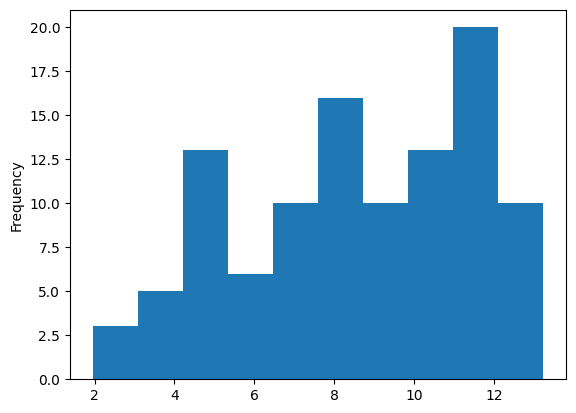

In [15]:
# 13. Plot et histogram over utdanningsnivå
data['Utdanning'].plot(kind='hist')

Her har vi plottet et histogram ved hjelp av 'Pandas'. Hvor vi ser frekvensen av de ulike utdanningstallene. Vi skal lære mer om plotting senere i kurset, da det er andre bibliotek (matplotlib og seaborn) som egner seg enda bedre for dette.

In [16]:
# 14. Bruke .loc for å hente data for et spesifikt land
norway_data = data.loc[data['Land'] == 'Norway']
print(norway_data)

     Land Landkode  BNP_per_capita  Utdanning  Befolkning     BNP_total
0  Norway      NOR        73262.68      11.65   4886000.0  3.579615e+11


In [17]:
# 15. Bruke .iloc for å hente rader og kolonner basert på indeks
subset = data.iloc[0:5, 0:3]  # Første 5 rader, første 3 kolonner
print(subset)

            Land Landkode  BNP_per_capita
0         Norway      NOR       73262.680
1         Kuwait      KWT       67029.523
2     Luxembourg      LUX       57882.809
3    Switzerland      CHE       55688.020
4  United States      USA       49500.629


In [18]:
# 16. Oppsummerende statistikk over BNP per innbygger
print("Gjennomsnittlig BNP per innbygger:", data['BNP_per_capita'].mean())
print("Median BNP per innbygger:", data['BNP_per_capita'].median())
print("Høyeste BNP per innbygger:", data['BNP_per_capita'].max())
print("Laveste BNP per innbygger:", data['BNP_per_capita'].min())

Gjennomsnittlig BNP per innbygger: 17295.935035
Median BNP per innbygger: 11444.3865
Høyeste BNP per innbygger: 73262.68
Laveste BNP per innbygger: 634.97137


# **Oppgaver**
Under er det et datasett dere skal lese inn og gjøre en rekke oppgaver. Bruk notatene over, Pandas dokumentasjon og Google som hjelp. Lykke til! :-)

Vi bruker et datasett som dere finner på GitHub under `'/data'` mappen kalt: `'bilparken_ssb.csv'`

## 📊 Oppgave 1
Les inn csv.-filen som en dataframe ved hjelp av Pandas biblioteket.

## 📊 Oppgave 2
Skriv en beskrivelse av data'en under her. Bruk kode for å inspisere data'en.

## 📊 Oppgave 3
Sjekk hvilke datatyper vi har i Dataframe'n

## 📊 Oppgave 4
Sorter datasettet, ```df``` fra oppgave 1, basert på variabelen "Personbiler vraket mot pant (prosent av bestanden)" - i synkende rekkefølge.

Verifiser at dere fikk dette til.

## 📊 Oppgave 5
Filtrer rader med høyere gjennomsnittsalder ved vraking enn **18 år**.


Her ser vi at flere 'Bilmerker' har forsvunnet fra dataframe'n - som f.eks. Tesla.

## 📊 Oppgave 6
Finn gjennomsnittlig `'Personbilbestand 31. desember'` for alle bilmerkene i datasettet.

## 📊 Oppgave 7
Finn bilmerket med høyest gjennomsnittsalder ved vraking.

Tips, her kan der fp bruk for funksjonene:
* ```df.loc```
* ```.idxmax()```

Det kan brukes slik:
```python
# Dette gjør at vi kan finne raden hvor høyeste verdien av 'kolonne_av_interesse' er.
df.loc[df['Kolonne_av_interesse'].idxmax()] 
```

Chevrolet er det bilmerke med høyest gjennomsnittlig vrakealder!

## 📊 Oppgave 8 - Statistisk sentralbyrå
SSB - Statistisk sentralbyrå sitter mye data. Det er også en arbeidsplass med mange samfunnsøkonomer og bedriftsøkonomer.

Uansett, vi har muligheten til å hente data der ifra. Koden under viser hvordan vi henter data fra SSB sitt API. Mer om det kan de interesserte lese [her](https://www.ssb.no/api/pxwebapi/_/attachment/inline/019c05e0-35ad-4757-87a0-ba7fbf4a68e2:397d9112916d85696733b77d376220c4465cb4fb/Api_brukerveiledning.pdf).

In [93]:
# hente CSV fra SSB til pandas

# Importerer Python pandas for å kunne lage dataframe
import pandas as pd

# pd.read_csv() henter innholdet fra API-et og legger det i data. 
# De norske datasettene her er semikolonseparert med komma som desimaltegn.
# CSV er ikke UTF-8, så vi må angi parameter encoding for å få æøå riktig. 

data = pd.read_csv("https://data.ssb.no/api/v0/dataset/1066.csv?lang=no", sep=';', decimal=',', encoding = "ISO-8859-1", )

## Oppgave 8a
Her i **Oppgave 8a** skal dere kommentere kodelinjene under, og si noe om hva de gjør.

In [94]:
#
type(data)

pandas.core.frame.DataFrame

In [95]:
#
data.shape

(13, 4)

In [96]:
#
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel"
0,"47 Detaljhandel, unntatt salg av motorvogner",2024M01,"Volumindeks, sesongjustert",91.6
1,"47 Detaljhandel, unntatt salg av motorvogner",2024M02,"Volumindeks, sesongjustert",92.1
2,"47 Detaljhandel, unntatt salg av motorvogner",2024M03,"Volumindeks, sesongjustert",92.5
3,"47 Detaljhandel, unntatt salg av motorvogner",2024M04,"Volumindeks, sesongjustert",92.4
4,"47 Detaljhandel, unntatt salg av motorvogner",2024M05,"Volumindeks, sesongjustert",95.9


In [97]:
#
data['måned']= pd.to_datetime(data['måned'].str.replace('M', '-'))

#
data.index = data['måned']

#
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2024-01-01 to 2025-01-01
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   næring                                                                 13 non-null     object        
 1   måned                                                                  13 non-null     datetime64[ns]
 2   statistikkvariabel                                                     13 non-null     object        
 3   07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 520.0+ bytes


In [98]:
# Se hva som skjedde med 'måned' kolonnen nå!
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel"
måned,,,,
2024-01-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-01-01,"Volumindeks, sesongjustert",91.6
2024-02-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-02-01,"Volumindeks, sesongjustert",92.1
2024-03-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-03-01,"Volumindeks, sesongjustert",92.5
2024-04-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-04-01,"Volumindeks, sesongjustert",92.4
2024-05-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-05-01,"Volumindeks, sesongjustert",95.9


<Axes: xlabel='måned'>

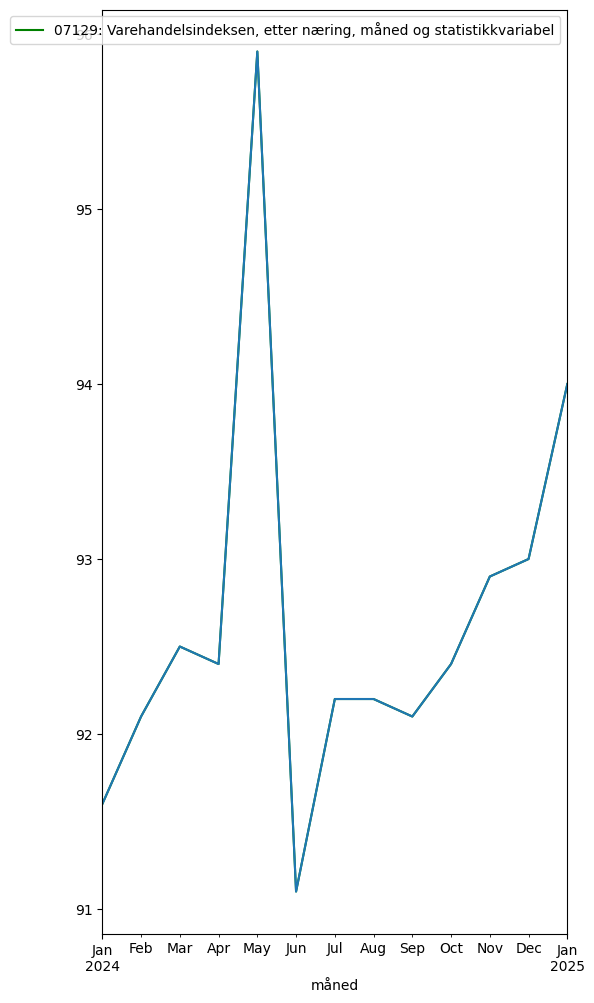

In [99]:
# 
data.plot(x='måned', y='07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel', figsize=(6, 12), color ='g')

# 
data_serie = data['07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel']

# 
data_serie.plot()

## Oppgave 8b
Utforsk et annet datasett fra SSB, ved å kjøre dette:
```python
# hente CSV fra SSB til pandas

# Importerer Python pandas for å kunne lage dataframe
import pandas as pd

# pd.read_csv() henter innholdet fra API-et og legger det i data. 
# De norske datasettene her er semikolonseparert med komma som desimaltegn.
# CSV er ikke UTF-8, så vi må angi parameter encoding for å få æøå riktig. 

ssb = pd.read_csv("https://data.ssb.no/api/v0/dataset/1078.csv?lang=no", sep=';', decimal=',', encoding = "ISO-8859-1", )
ssb
```

Utforsk denne datarammen, ved å gjøre følgende:
1. Last inn data.
2. Se på de første fem radene.
3. Bruk Pandas til å få informasjon om datarammen.
4. Bruk `ssb.describe()` for å beskrive de numeriske kolonnene.
5. Undersøk unike verdier i hver kolonne.
6. Grupper data etter `region` og `kjønn`, og se hvor mange som er i de ulike gruppene.
7. Filtrer spesifikke verdier. F.eks. Kjør `ssb[ssb['kjønn'] == '2 Kvinner']` - hva får du da? Prøv å filtrere på andre ting?
8. Bruk **pandas** til å visualisere hvor mange kvinner og hvor mange menn det er i Halden. Du vil få bruk for Pandas funksjonene, `groupby()` og `.sum()`.

## 📊 Oppgave 9 - Eurostat

Eurostat er en veldig nyttig kilde til data. De har et stort utvalg av data på europeiske land. De har laget en egen pakke til python som ikke overraskende heter `eurostat`. Denne pakken er heller ikke installert, så dere må kjøre  `!pip install eurostat` først. Gå igjennom de neste *chunkene* med kode, og prøv å forstå hva vi gjør.

For å se hvilke tabeller som er der, henter vi innholdsfortegnelsen (table of contents) med funksjonen `get_toc_df`. Det gir oss en `pandas` dataramme:

#### Laster ned `eurostat` med pip.

In [72]:
!pip install eurostat

In [51]:
import eurostat
toc = eurostat.get_toc_df()
toc

,title,code,type,last update of data,last table structure change,data start,data end
0,"Employed recent immigrants by sex, age and cit...",LFST_RIMGENGA,dataset,2024-12-12T23:00:00+0100,2024-04-24T23:00:00+0200,2008,2023
1,"Recent immigrants by sex, age and country of b...",LFST_RIMGPCGA,dataset,2024-12-12T23:00:00+0100,2024-04-24T23:00:00+0200,2008,2023
2,"Recent immigrants by sex, age and citizenship",LFST_RIMGPNGA,dataset,2024-12-12T23:00:00+0100,2024-04-24T23:00:00+0200,2008,2023
3,"Activity rates by sex, age, educational attain...",LFST_R_AREDCOBU,dataset,2024-12-12T23:00:00+0100,2024-04-24T23:00:00+0200,1995,2023
4,"Activity rates by sex, age, educational attain...",LFST_R_AREDNU,dataset,2024-12-12T23:00:00+0100,2024-04-24T23:00:00+0200,1995,2023
...,...,...,...,...,...,...,...
7986,International inbound and outbound postal traf...,POST_CUBE1_X$POST_ITR_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7987,Domestic postal services (USP) - access points...,POST_CUBE_HIST_X$POST_PS_AC,dataset,2018-12-13T12:00:00Z,2018-12-13T12:00:00Z,None,None
7988,Domestic and international postal services (US...,POST_CUBE_HIST_X$POST_PS_LET,dataset,2018-12-13T12:00:00Z,2018-12-13T12:00:00Z,None,None
7989,Postal services - historical data,POST_CUBE_HIST_X,dataset,2021-10-12T04:09:13Z,2021-10-12T04:09:13Z,2004,2011


Du kan finne hvor mange tabeller det er med `len(toc)`, og det er i skrivende stund er det rundt 8 tusen tabeller. Det blir litt krevende å lete gjennom alle, så vi ønsker derfor å begrense antall tabeller til de som er relevante. Anta at vi ønsker å se på utviklingen i BNP per innbygger for landene som er med i statistikken. Nærmere bestemt, vi ønsker å finne alle tabeller der `'GDP per capita'` er i tittelen. 

BNP per innbygger er hvor mye hver person i landet i gjennomsnitt produserer i løpet av ett år. 

Vi gjør dette ved å lage følgende "list comprehension": `['GDP per capita' in i for i in toc['title']]`. Elementene i denne listen er sant (`True`) dersom 'GDP per capita' er i tittelen, og usant (`false`) om det ikke er i tittelen. 

#### Det gjør vi slik:

In [53]:
gdp_in_toc_list = ['GDP per capita' in i for i in toc['title']]

Vi kan så velge de elementene hvor betingelsen er sann ved å sette listen inn i en klammeparentes etter innholdsfortegnelsen, `toc[gdp_in_toc_list]`. Kun de elementene i innholdsfortegnelsen der det står sant (`True`) i listen, tas da med.

In [54]:
# collecting only the tables where 'GDP per capita' is in the name
toc_gdp = toc[gdp_in_toc_list]
toc_gdp

,title,code,type,last update of data,last table structure change,data start,data end
6114,Real GDP per capita,TIPSNA40,dataset,2025-02-28T23:00:00+0100,2025-02-28T23:00:00+0100,1995,2024
6383,GDP per capita in PPS,TEC00114,dataset,2025-01-14T23:00:00+0100,2025-01-14T23:00:00+0100,2012,2023
7838,Real GDP per capita,SDG_08_10,dataset,2025-02-28T23:00:00+0100,2025-02-28T23:00:00+0100,2000,2024
7852,Purchasing power adjusted GDP per capita,SDG_10_10,dataset,2025-01-14T23:00:00+0100,2025-01-14T23:00:00+0100,2000,2023


La oss nå se på tabellen `"Real GDP per capita"`, som har kode `'TIPSNA40'`. Da bruker vi funksjonen `get_data_df` med tabellkoden som argument: 


#### Laster inn denne tabellen

In [55]:
gdp_data = eurostat.get_data_df('TIPSNA40')
gdp_data

,freq,unit,na_item,geo\TIME_PERIOD,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,CLV15_EUR_HAB,B1GQ,AT,30290.0,30920.0,31540.0,32610.0,33770.0,34760.0,...,39640.0,39970.0,40620.0,41430.0,41970.0,39140.0,40860.0,42540.0,41770.0,NaN
1,A,CLV15_EUR_HAB,B1GQ,BE,28400.0,28720.0,29740.0,30250.0,31260.0,32340.0,...,36860.0,37110.0,37510.0,38040.0,38760.0,36740.0,38860.0,40180.0,40340.0,NaN
2,A,CLV15_EUR_HAB,B1GQ,BG,3630.0,3840.0,3320.0,3460.0,3190.0,3350.0,...,6560.0,6840.0,7130.0,7410.0,7800.0,7620.0,8270.0,8660.0,8850.0,NaN
3,A,CLV15_EUR_HAB,B1GQ,CY,17530.0,17470.0,17680.0,18530.0,19240.0,20180.0,...,21220.0,22460.0,23530.0,24700.0,25800.0,24690.0,27240.0,28860.0,29150.0,NaN
4,A,CLV15_EUR_HAB,B1GQ,CZ,10320.0,10770.0,10720.0,10690.0,10850.0,11290.0,...,16230.0,16640.0,17490.0,17960.0,18570.0,17670.0,18380.0,18450.0,18240.0,NaN
5,A,CLV15_EUR_HAB,B1GQ,DE,28960.0,29210.0,29730.0,30380.0,31040.0,31920.0,...,37770.0,38330.0,39220.0,39540.0,39840.0,38180.0,39570.0,39820.0,39380.0,39190.0
6,A,CLV15_EUR_HAB,B1GQ,DK,39110.0,39990.0,41080.0,41900.0,43000.0,44450.0,...,47900.0,48970.0,50150.0,50830.0,51500.0,50470.0,53970.0,54310.0,55280.0,56980.0
7,A,CLV15_EUR_HAB,B1GQ,EA20,24610.0,24980.0,25590.0,26300.0,27030.0,27990.0,...,31120.0,31590.0,32340.0,32830.0,33270.0,31220.0,33180.0,34180.0,34100.0,NaN
8,A,CLV15_EUR_HAB,B1GQ,EE,6410.0,6840.0,7830.0,8250.0,8300.0,8990.0,...,16000.0,16460.0,17390.0,17990.0,18580.0,17990.0,19260.0,19240.0,18200.0,NaN
9,A,CLV15_EUR_HAB,B1GQ,EL,14290.0,14430.0,14870.0,15300.0,15650.0,16230.0,...,16210.0,16270.0,16540.0,16920.0,17320.0,15760.0,17220.0,18310.0,18800.0,NaN


## **Oppgave 9a - Jobbe med data**
Du har fått utdelt et datasett `gdp_data` som inneholder BNP per innbygger (GDP per capita) for ulike europeiske land over flere år. Dataene har noen utfordringer, som manglende verdier (NaN) og kolonner som ikke er relevante for analysen.

Målet med oppgaven er å:

* Rydde opp i dataene ved å fjerne unødvendige kolonner og håndtere eventuelle manglende verdier.
* Ekstrahere data kun for Italia (IT), Danmark (DK) og Sverige (SE).
* Transformere dataene slik at årstallene blir kolonner, og vi har et rent format.
* Utføre beskrivende statistikk og visualisere utviklingen i BNP per capita for de tre landene.
* Bruke standard pandas-metoder for å utforske dataene videre.

##  🔄 Del 1: Rens og filtrer data
1. Last inn datasettet i en pandas DataFrame.
2. Fjern unødvendige kolonner (f.eks. `freq`, `unit`, `na_item`).
3. Behold kun rader for Italia (IT), Danmark (DK) og Sverige (SE).
4. Sjekk og håndter eventuelle manglende verdier (`NaN`).

## 🔄 Del 2: Transformér data

1. Sett opp DataFrame slik at:
   - `geo\TIME_PERIOD` blir indeks.
   - Årstallene blir kolonnenavn.
   - BNP per capita-verdiene for hvert land forblir i tabellen.
2. Konverter eventuelle verdier som er lagret som `object` til `float`.

## 📊 Del 3: Videre analyse av data

1. Beregn beskrivende statistikk for hvert av landene:
   - Gjennomsnitt, median, standardavvik.
   - Maksimum og minimum BNP per capita.
2. Finn ut hvilket år hvert land hadde høyest BNP per capita.

##### [< Forrige](4%20-%20lister_oppslag_numpy.ipynb)     |     [Neste >](6%20-%20Logikk_løkker.ipynb)